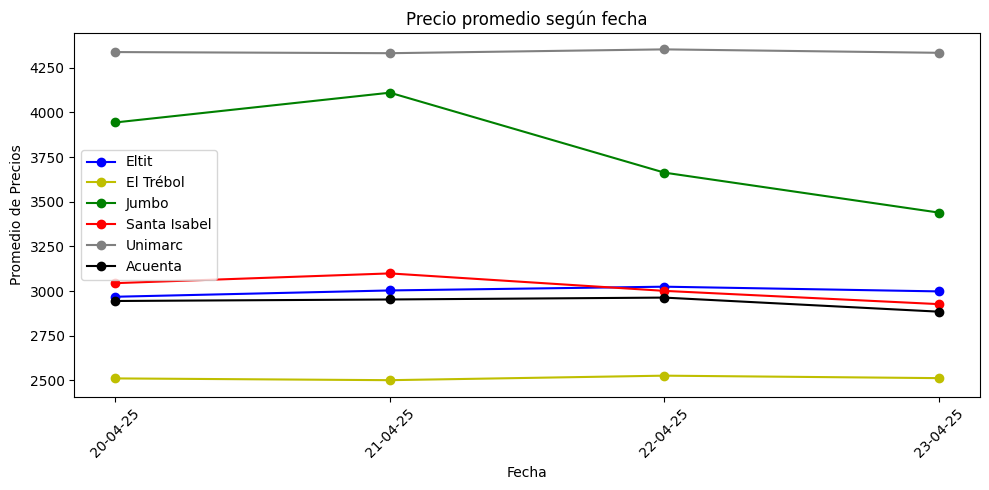

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

promedio_eltit = []
fechas_eltit = []

for child in Path('../../scrappers/eltit/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_eltit.append(data['price'].mean())
        fechas_eltit.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_eltit, promedio_eltit = zip(*sorted(zip(fechas_eltit, promedio_eltit)))

promedio_eltrebol = []
fechas_eltrebol = []

for child in Path('../../scrappers/eltrebol/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_eltrebol.append(data['price'].mean())
        fechas_eltrebol.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_eltrebol, promedio_eltrebol = zip(*sorted(zip(fechas_eltrebol, promedio_eltrebol)))


promedio_jumbo = []
fechas_jumbo = []

for child in Path('../../scrappers/jumbo/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_jumbo.append(data['price'].mean())
        fechas_jumbo.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_jumbo, promedio_jumbo = zip(*sorted(zip(fechas_jumbo, promedio_jumbo)))

promedio_santaisabel = []
fechas_santaisabel = []

for child in Path('../../scrappers/santaisabel/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_santaisabel.append(data['price'].mean())
        fechas_santaisabel.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_santaisabel, promedio_santaisabel = zip(*sorted(zip(fechas_santaisabel, promedio_santaisabel)))

promedio_unimarc = []
fechas_unimarc = []

for child in Path('../../scrappers/unimarc/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_unimarc.append(data['price'].mean())
        fechas_unimarc.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_unimarc, promedio_unimarc = zip(*sorted(zip(fechas_unimarc, promedio_unimarc)))

promedio_acuenta = []
fechas_acuenta = []

for child in Path('../../scrappers/acuenta/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['price'] = pd.to_numeric(data['price'], errors='coerce')
        promedio_acuenta.append(data['price'].mean())
        fechas_acuenta.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_acuenta, promedio_acuenta = zip(*sorted(zip(fechas_acuenta, promedio_acuenta)))

plt.figure(figsize=(10, 5))

plt.plot(fechas_eltit, promedio_eltit, marker='o', color='b', label='Eltit')
plt.plot(fechas_eltrebol, promedio_eltrebol, marker='o', color='y', label='El Trébol')
plt.plot(fechas_jumbo, promedio_jumbo, marker='o', color='g', label='Jumbo')
plt.plot(fechas_santaisabel, promedio_santaisabel, marker='o', color='r', label='Santa Isabel')
plt.plot(fechas_unimarc, promedio_unimarc, marker='o', color='gray', label='Unimarc')
plt.plot(fechas_acuenta, promedio_acuenta, marker='o', color='black', label='Acuenta')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precios')
plt.title('Precio promedio según fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.savefig('graph.png', bbox_inches='tight')
plt.show()

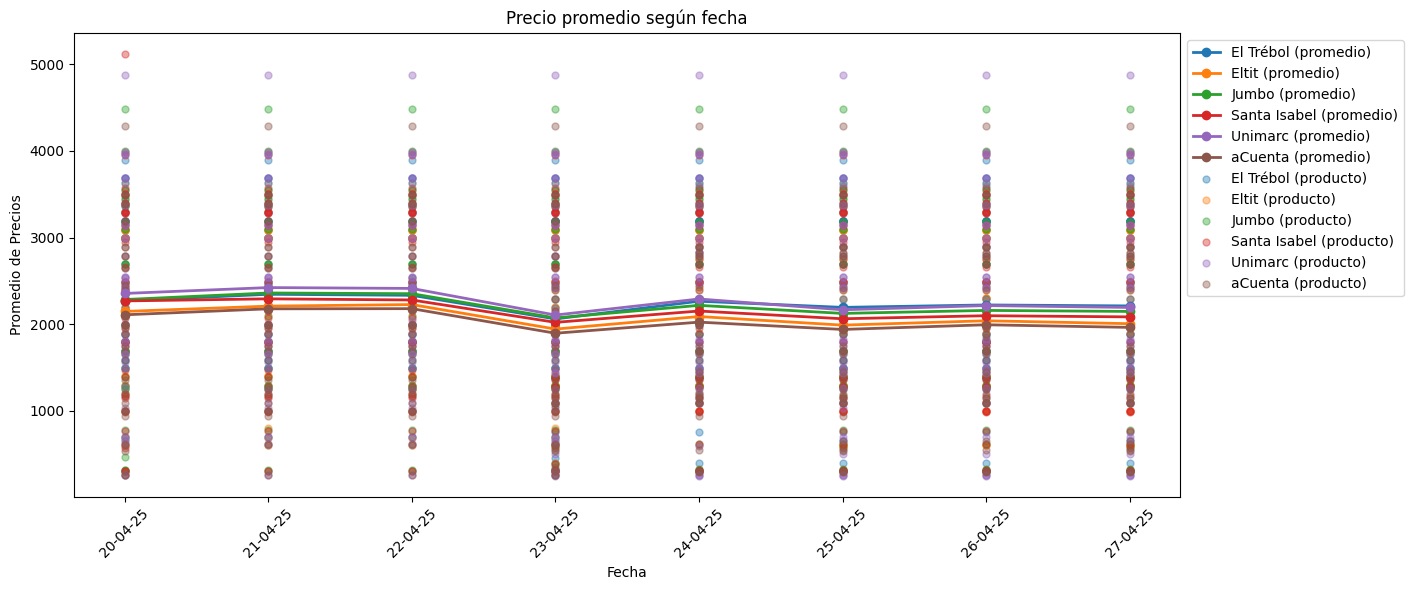

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

route = Path('../../filters/common-products-filter/results/')

files = sorted([f for f in route.iterdir() if f.is_file()])
products_by_date = []

for file in files:
    df = pd.read_csv(file)
    products = set(df['search'].dropna().unique())
    products_by_date.append(products)

products_in_common = set.intersection(*products_by_date)

supermarkets = {
    "acuenta": ([], [], "aCuenta"), 
    "eltit": ([], [], "Eltit"), 
    "eltrebol": ([], [], "El Trébol"), 
    "jumbo": ([], [], "Jumbo"), 
    "santaisabel": ([], [], "Santa Isabel"), 
    "unimarc": ([], [], "Unimarc")
}

averages_records = []
individual_records= []

for file in files:
    df = pd.read_csv(file)
    date = datetime.strptime(file.name.replace(".csv", ""), "%d-%m-%Y").date()
    df = df[df['search'].isin(products_in_common)]
    
    for name, sp_data in supermarkets.items():
        prices = pd.to_numeric(df[f"price_{name}"], errors='coerce')
        prices = prices.dropna()
        
        if not prices.empty:
            supermarkets[name][0].append(prices.mean())
            supermarkets[name][1].append(date)

            for price in prices:
                individual_records.append({
                    "date": date,
                    "price": price,
                    "supermarket": supermarkets[name][2]
                })
                
df_averages = pd.DataFrame({
    "date": sum([sp_data[1] for sp_data in supermarkets.values()], []),
    "average": sum([sp_data[0] for sp_data in supermarkets.values()], []),
    "supermarket": sum([[sp_data[2]] * len(sp_data[0]) for sp_data in supermarkets.values()], [])
})

df_individual = pd.DataFrame(individual_records)

df_averages.sort_values(by="date", inplace=True)
df_individual.sort_values(by="date", inplace=True)

plt.figure(figsize=(12, 6))

for supermarket, df_group in df_averages.groupby("supermarket"):
    plt.plot(df_group["date"], df_group["average"], marker='o', label=f"{supermarket} (promedio)", linewidth=2)

for supermarket, df_group in df_individual.groupby("supermarket"):
    plt.scatter(df_group["date"], df_group["price"], alpha=0.4, label=f"{supermarket} (producto)", s=25)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precios')
plt.title('Precio promedio según fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.savefig('graph.png', bbox_inches='tight')
plt.show()